In [8]:
import matplotlib.pyplot as plt
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rand
from math import *
from sklearn.linear_model import Ridge

def nf(x):
    return 0.51 *x + 0.14 + 0.001*np.sin(x)

def f(a,b,X,Y_ref):
    N= len(X)
    loss=0.0
    for i in range(0,N):
        Y = a * X[i] + b
        loss = loss+(1.0/N)*(Y-Y_ref[i])**2.0 
    return loss
    
def grad_f(a,b,X,Y_ref,m):
    N= len(X)
    a_grad=0.0
    b_grad=0.0
    list_i = [i for i in range(0,N)]
    for i in range(0,m):
        ik= list_i[rand.randint(0,len(list_i)-1)]
        list_i.remove(ik)
        
        Y = a * X[ik] + b
        a_grad= a_grad+ (2/m)*X[ik]*(Y-Y_ref[ik])
        b_grad= b_grad+(2/m)*(Y-Y_ref[ik])
        
    return np.array([a_grad,b_grad])



def plot_gradient(N=200,m=200,K=500,eta=0.025):
    a,b = -0.4, 1.2
    X=np.random.uniform(-1.0,1.0,N)
    Xmod= np.expand_dims(X, axis=1)
    Y_ref= nf(X)

    evolution_a_b = [[a,b]]

    for i in range(0,K):
    
        grad = grad_f(a,b,X,Y_ref,m)
        direction = -grad
        a, b = a + eta*direction[0], b + eta*direction[1] 
        evolution_a_b = np.vstack((evolution_a_b, [a, b]))

    evolution_a= evolution_a_b[:, 0]
    evolution_b = evolution_a_b[:, 1]

    ax = np.linspace(-2.0, 2.0, 200)
    bx = np.linspace(-2.0, 2.0, 200)
    Ax, Bx = np.meshgrid(ax, bx)
    Z = f(Ax,Bx,X,Y_ref)
    fig = plt.figure(figsize = (10,6))
    contours = plt.contour(Ax,Bx, Z, 20)
    plt.clabel(contours, inline = True, fontsize = 10)
    plt.title("Niveau de la fonction coût et descente de gradient", fontsize=12)
    plt.plot(evolution_a, evolution_b)
    plt.plot(evolution_a, evolution_b, '*', label = "J(a,b)")
    plt.xlabel('a', fontsize=11)
    plt.ylabel('b', fontsize=11)
    plt.colorbar()
    plt.legend(loc = "upper right")
    plt.show()
    
    clf = Ridge(alpha=0.0)
    clf.fit(Xmod, Y_ref)
    
    print(clf.intercept_," ",clf.coef_[0])
    print(evolution_b[-1]," ",evolution_a[-1])

    print("Erreur :",abs(clf.coef_[0]-evolution_a[-1])+abs(clf.intercept_-evolution_b[-1]))

In [ ]:
N = widgets.IntSlider(value=200,min=50,max=400,step=10,description="nb Données")
m = widgets.IntSlider(value=50,min=1,max=200,step=5,description="batch size")
K = widgets.IntSlider(value=400,min=50,max=500,step=10,description="Iteration")
eta = widgets.FloatSlider(value=0.03,min=0.01,max=0.1,step=0.01,description="eta")

ui = widgets.HBox([sigma,dim])

out = widgets.interactive_output(plot_overfitting_lasso, {'sigma':sigma,'dim':dim})

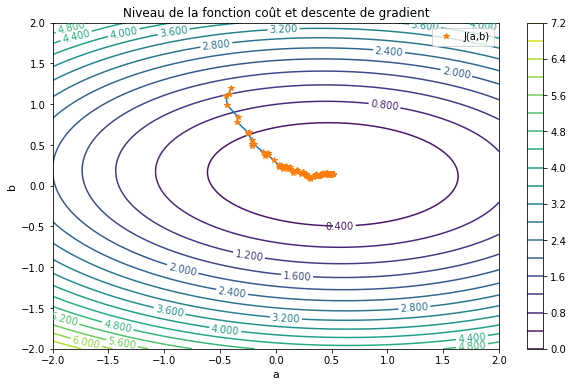

0.13999929320704338   0.5109090656642219
0.1399916268879189   0.510900933097615
Erreur : 1.5798885731388435e-05


In [14]:
plot_gradient(200,1,400,0.05)